# Yellow Brick

In [1]:
#!pip install yellowbrick

/home/span/anaconda3/lib/python3.11/site-packages/yellowbrick/anscombe.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=color)
/home/span/anaconda3/lib/python3.11/site-packages/yellowbrick/anscombe.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, c=color)
/home/span/anaconda3/lib/python3.11/site-packages/yellowbrick/anscombe.py:75: UserWarning: *c* argument looks like a single nume

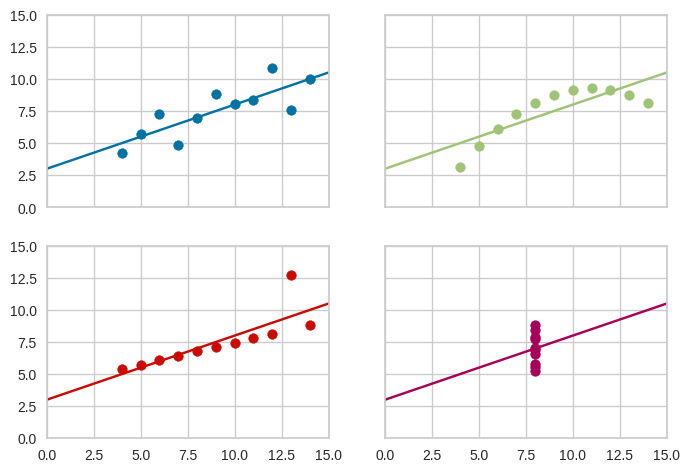

In [2]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

## A Walk Through

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_bikeshare

X, y = load_bikeshare()
X.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


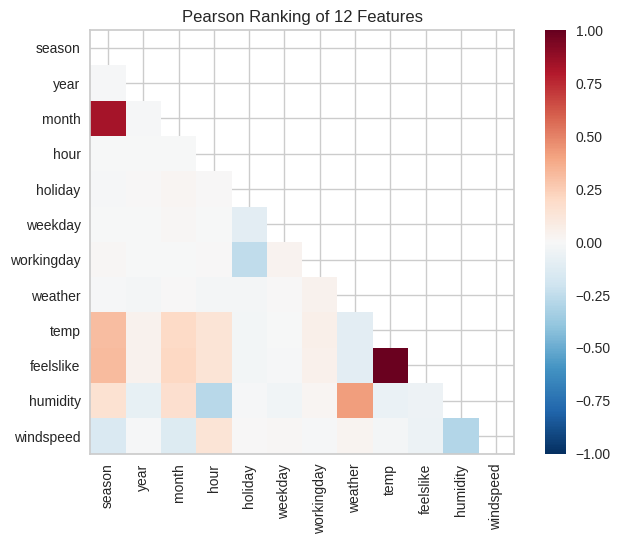

<Axes: title={'center': 'Pearson Ranking of 12 Features'}>

In [4]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)Through
visualizer.show()

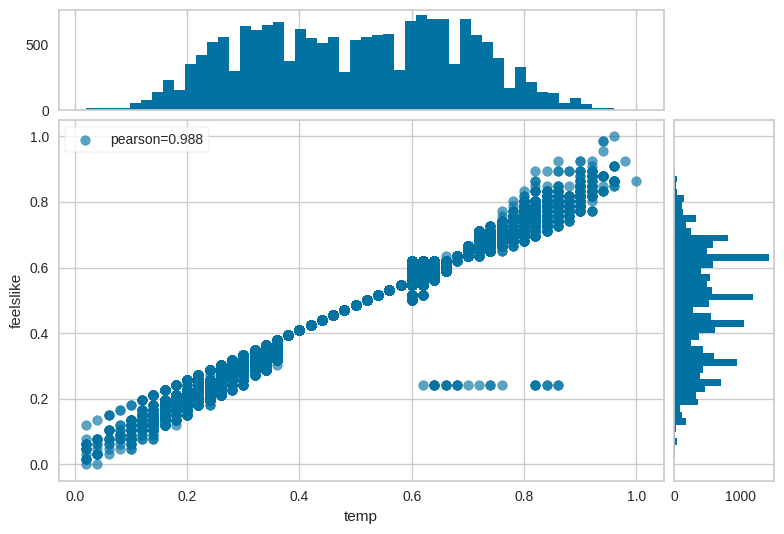

<Axes: xlabel='temp', ylabel='feelslike'>

In [5]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp', 'feelslike'])
visualizer.fit_transform(X, y)
visualizer.show()

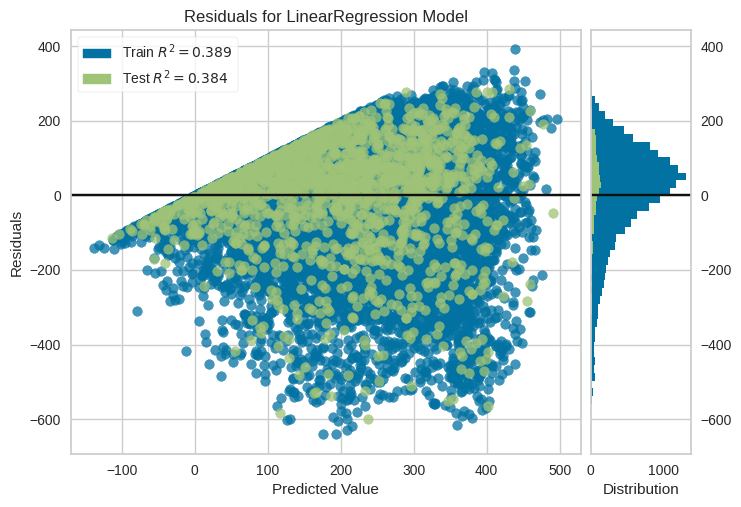

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [6]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

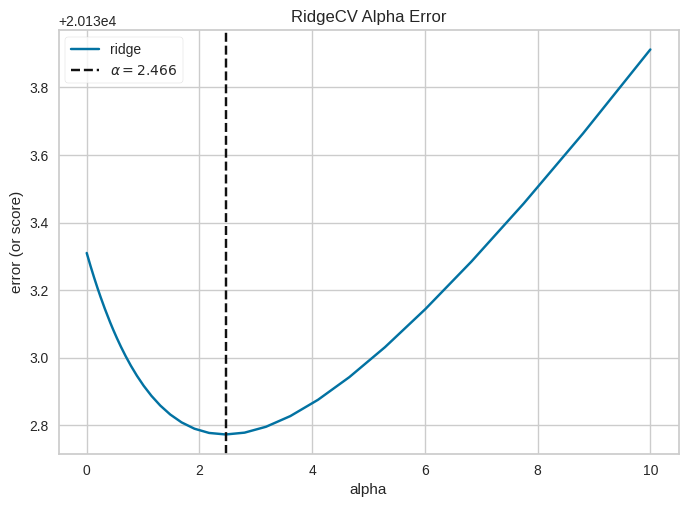

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [7]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show()

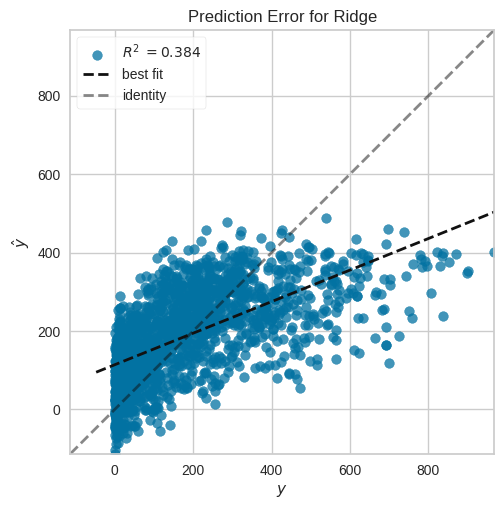

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [8]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Feature Analysis Visualizer

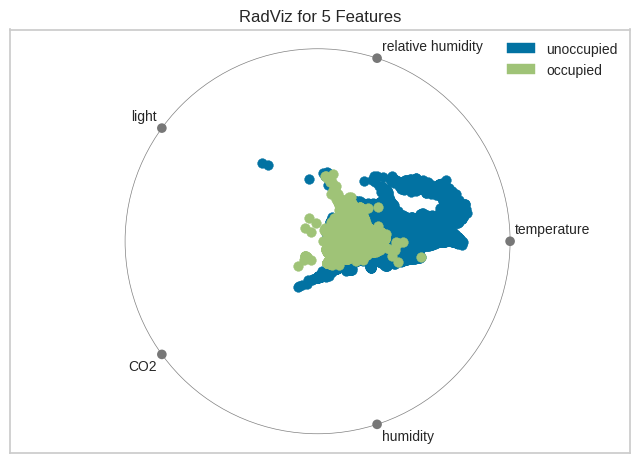

RadialVisualizer(ax=<Axes: title={'center': 'RadViz for 5 Features'}>,
                 classes=['unoccupied', 'occupied'])

In [9]:
from yellowbrick.features.radviz import radviz
from yellowbrick.datasets import load_occupancy

#Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
radviz(X, y, classes=classes)

/home/span/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


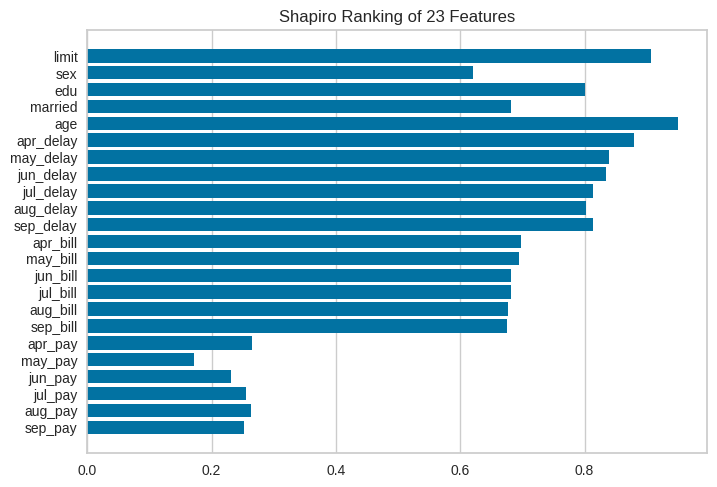

<Axes: title={'center': 'Shapiro Ranking of 23 Features'}>

In [10]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()     

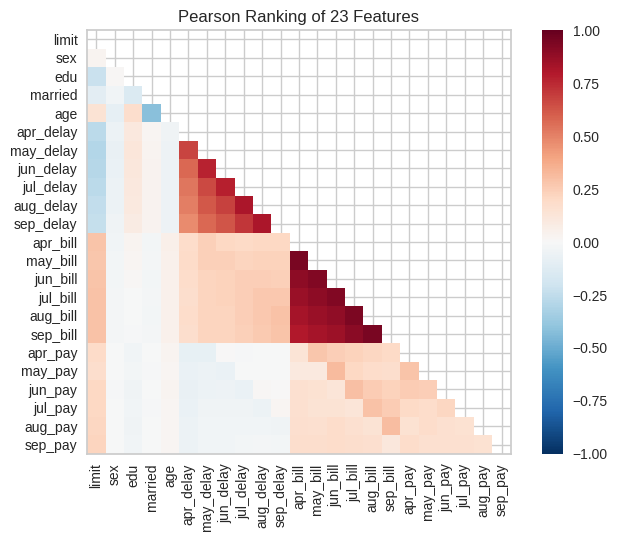

<Axes: title={'center': 'Pearson Ranking of 23 Features'}>

In [11]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()   

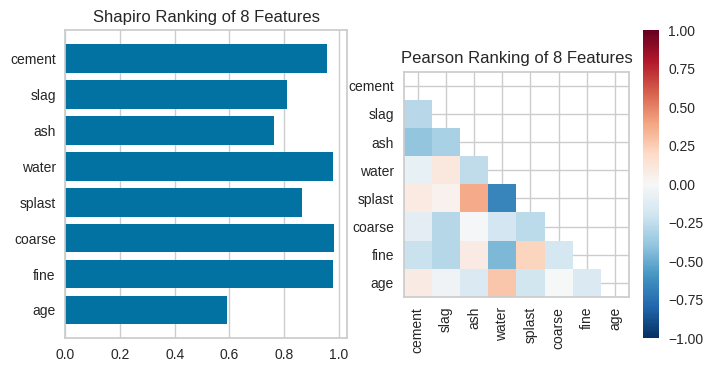

In [12]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

# Load the concrete dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

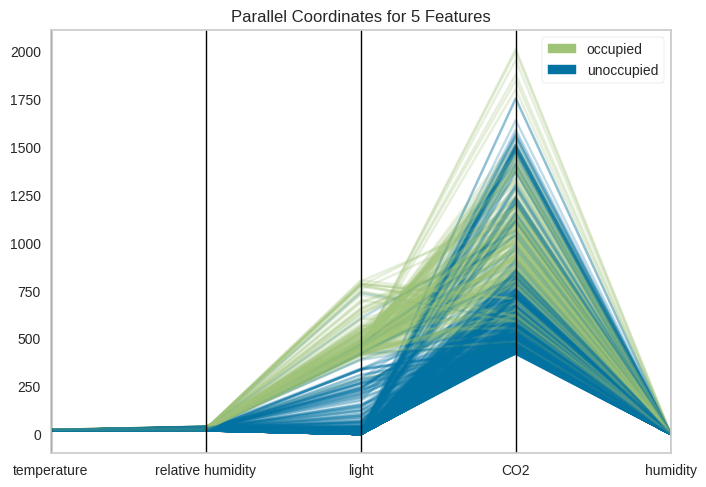

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [13]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show()

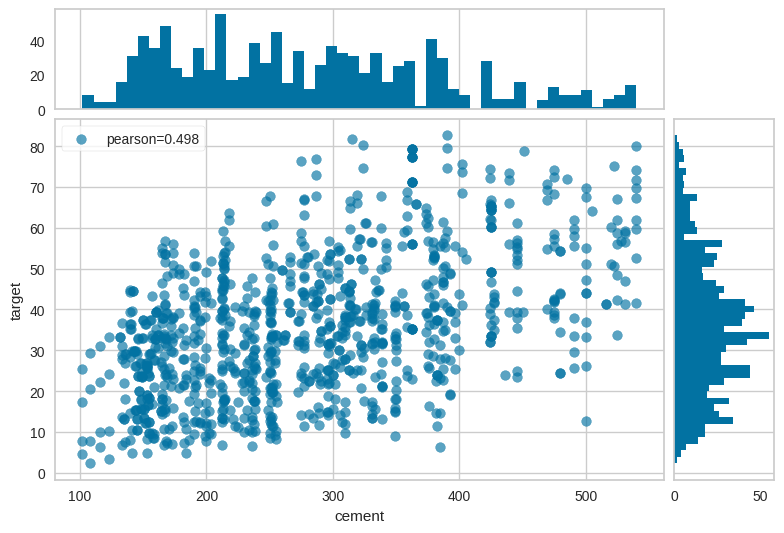

<Axes: xlabel='cement', ylabel='target'>

In [14]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="cement")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()     

## Model Selection

In [15]:
from yellowbrick.datasets import load_mushroom

X, y = load_mushroom()
print(X[:5]) 

    shape surface   color
0  convex  smooth  yellow
1    bell  smooth   white
2  convex   scaly   white
3  convex  smooth    gray
4  convex   scaly  yellow


In [16]:
X

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * ((precision * recall) / (precision + recall))

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Label-encode targets before modeling
y = LabelEncoder().fit_transform(y)

# One-hot encode columns before modeling
estimator = RandomForestClassifier(n_estimators=300)
model = Pipeline([
 ('one_hot_encoder', OneHotEncoder()),
 ('estimator', estimator)
])


# Instantiate the classification model and visualizer
model.fit(X, y)

expected  = y
predicted = model.predict(X)

# Compute and return F1 (harmonic mean of precision and recall)
print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

RandomForestClassifier: 0.6871364804544838


In [18]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [19]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier


models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(X, y, model)

SVC: 0.6624286455630514
NuSVC: 0.6726016476215785
LinearSVC: 0.6583804143126177
SGDClassifier: 0.6825938566552902


/home/span/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KNeighborsClassifier: 0.19273504273504272
LogisticRegression: 0.6580434509606933


/home/span/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV: 0.6583804143126177
BaggingClassifier: 0.6874746655857316
ExtraTreesClassifier: 0.6871364804544838
RandomForestClassifier: 0.687643484132343


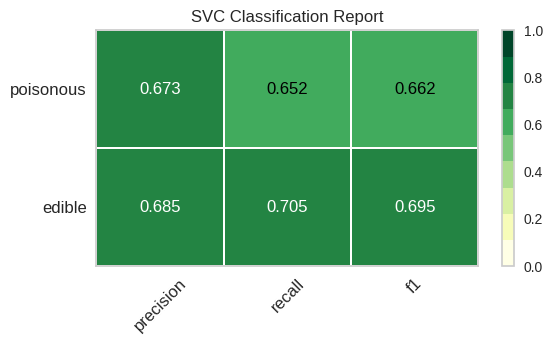

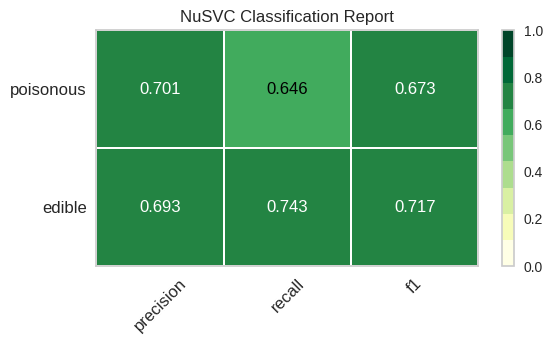

/home/span/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


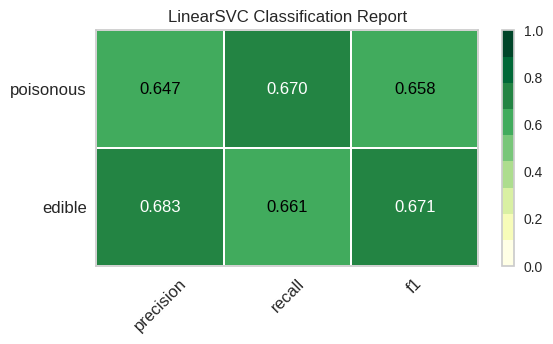

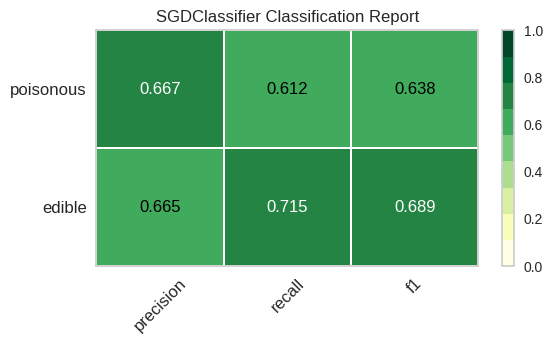

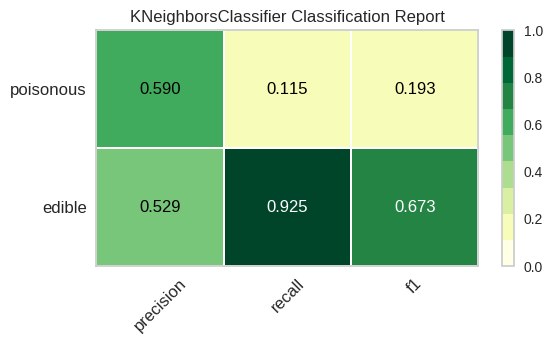

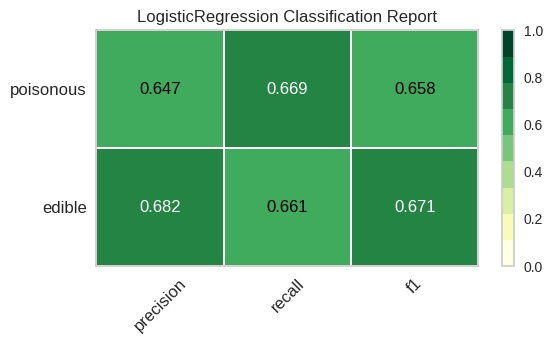

/home/span/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


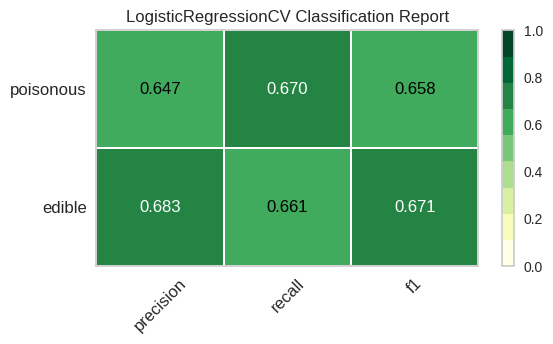

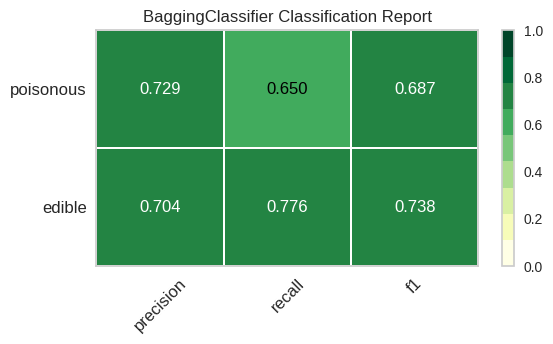

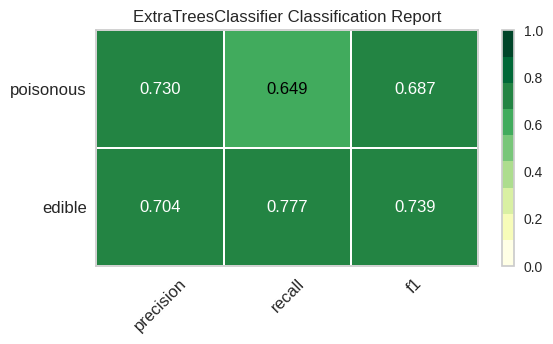

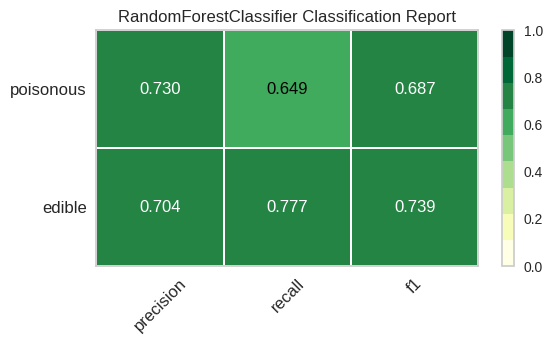

In [20]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(X, y, model)

## Regression Visyalizers, Residuals Plot

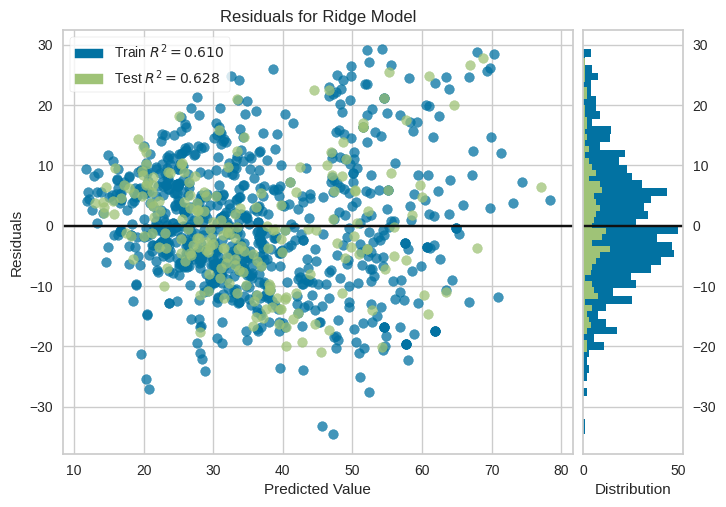

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

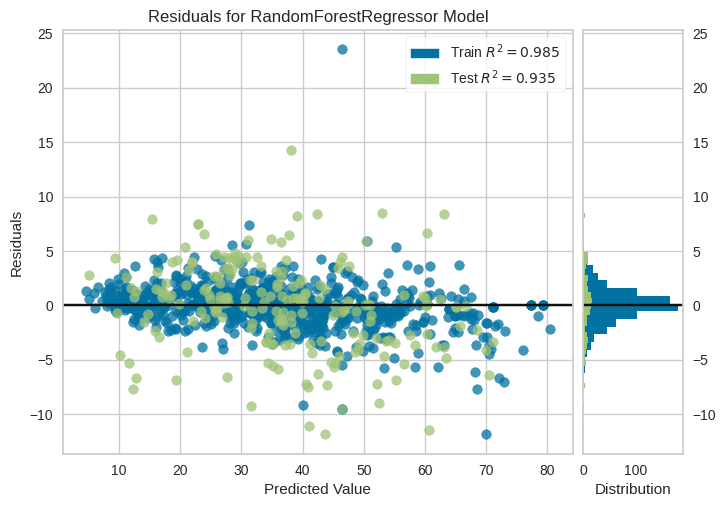

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

## Classification Visualizers

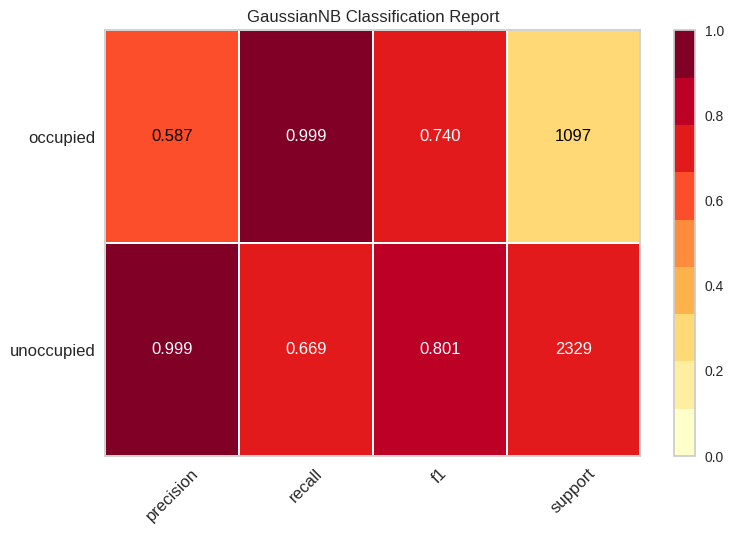

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report

# Load the classification data set
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the visualizer
visualizer = classification_report(
    GaussianNB(), X_train, y_train, X_test, y_test, classes=classes, support=True
)


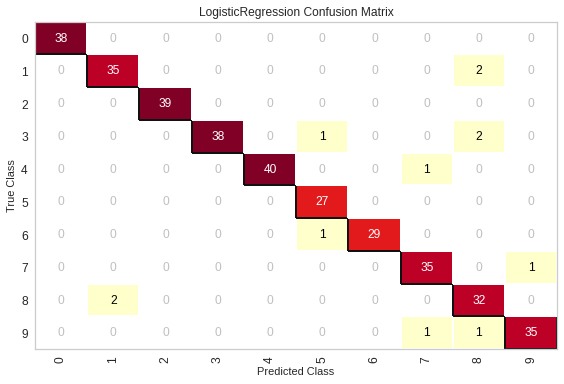

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

/home/span/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


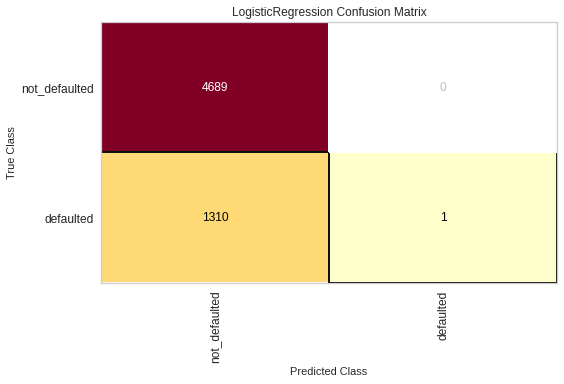

<Figure size 576x396 with 0 Axes>

In [29]:
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()


In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

In [ ]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(model)

visualizer.fit(X_train_pca, y_train_pca)
visualizer.score(X_test_pca, y_test_pca)
visualizer.show()